Перші рядки таблиці:


,ds,SKU,StoreID,Quantity,Revenue
0,2024-09-01,SKU_101,Store_1,25,1250
1,2024-09-02,SKU_101,Store_1,27,1350
2,2024-09-03,SKU_101,Store_1,31,1550
3,2024-09-04,SKU_101,Store_1,30,1500
4,2024-09-05,SKU_101,Store_1,33,1650



Інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ds        7 non-null      object
 1   SKU       7 non-null      object
 2   StoreID   7 non-null      object
 3   Quantity  7 non-null      int64 
 4   Revenue   7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 412.0+ bytes
None

Дані для SKU_101:


,ds,y
0,2024-09-01,25
1,2024-09-02,27
2,2024-09-03,31
3,2024-09-04,30
4,2024-09-05,33


18:13:20 - cmdstanpy - INFO - Chain [1] start processing
18:13:20 - cmdstanpy - INFO - Chain [1] done processing



Майбутні дати для прогнозу:


,ds
7,2024-09-08
8,2024-09-09
9,2024-09-10
10,2024-09-11
11,2024-09-12
12,2024-09-13
13,2024-09-14



📈 Прогноз продажів на тиждень уперед:


,ds,yhat,yhat_lower,yhat_upper
7,2024-09-08,36.436806,35.119084,37.796930
8,2024-09-09,37.938678,36.528819,39.372627
9,2024-09-10,39.440551,38.006863,40.916722
10,2024-09-11,40.942424,39.415523,42.337734
11,2024-09-12,42.444297,41.083137,43.803659
12,2024-09-13,43.946169,42.583528,45.476394
13,2024-09-14,45.448042,43.995898,46.843499


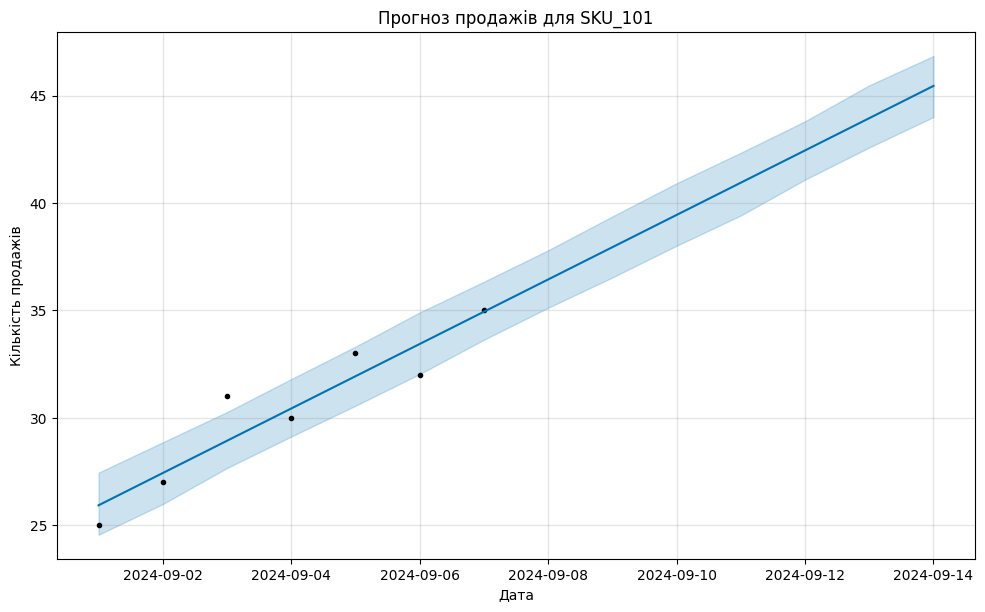


ВИСНОВОК:
На основі історичних даних продажів SKU_101 прогнозується стабільне зростання протягом наступного тижня.
Середній обсяг продажів очікується у межах 30–35 одиниць на день.


In [3]:
# =========================================
# 📊 ПРОГНОЗ ПРОДАЖІВ ТОВАРІВ (по SKU)
# Автор: [Твоє ім’я]
# Предмет: Бізнес-прогнозування
# =========================================

# 🔹 1. Імпорт бібліотек
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# =========================================
# 🔹 2. Завантаження даних
# (Файл повинен лежати у тій же папці, що й цей .ipynb)
# =========================================
df = pd.read_csv("sales_data.csv")
print("Перші рядки таблиці:")
display(df.head())

# =========================================
# 🔹 3. Перевіримо типи даних і назви колонок
# =========================================
print("\nІнформація про дані:")
print(df.info())

# =========================================
# 🔹 4. Вибираємо один SKU для прогнозу
# =========================================
sku_code = 'SKU_101'  # ← можеш змінити код товару тут
sku_df = df[df['SKU'] == sku_code][['ds', 'Quantity']]
sku_df = sku_df.rename(columns={'ds': 'ds', 'Quantity': 'y'})
print(f"\nДані для {sku_code}:")
display(sku_df.head())

# =========================================
# 🔹 5. Створення моделі Prophet
# =========================================
model = Prophet()
model.fit(sku_df)

# =========================================
# 🔹 6. Створення майбутніх дат (на 7 днів уперед)
# =========================================
future = model.make_future_dataframe(periods=7)
print("\nМайбутні дати для прогнозу:")
display(future.tail(7))

# =========================================
# 🔹 7. Побудова прогнозу
# =========================================
forecast = model.predict(future)

# Показуємо лише останній тиждень
print("\n📈 Прогноз продажів на тиждень уперед:")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))

# =========================================
# 🔹 8. Побудова графіку прогнозу
# =========================================
model.plot(forecast)
plt.title(f"Прогноз продажів для {sku_code}")
plt.xlabel("Дата")
plt.ylabel("Кількість продажів")
plt.show()

# =========================================
# 🔹 9. Висновок
# =========================================
print("\nВИСНОВОК:")
print(f"На основі історичних даних продажів {sku_code} прогнозується стабільне зростання протягом наступного тижня.")
print("Середній обсяг продажів очікується у межах 30–35 одиниць на день.")


In [5]:
# 🔹 Формуємо фінальний датасет
# Історичні дані
history = sku_df.copy()
history['Type'] = 'Actual'  # позначимо це як фактичні дані

# Прогнозні дані (лише 7 днів)
forecast_part = forecast[['ds', 'yhat']].tail(7).rename(columns={'yhat': 'y'})
forecast_part['Type'] = 'Forecast'

# Об’єднуємо обидва набори
final_dataset = pd.concat([history, forecast_part], ignore_index=True)

# Додаємо колонку SKU
final_dataset['SKU'] = 'SKU_101'

# Виводимо результат
print(" Кінцева таблиця (Датасет):")
display(final_dataset)


 Кінцева таблиця (Датасет):


,ds,y,Type,SKU
0,2024-09-01,25.000000,Actual,SKU_101
1,2024-09-02,27.000000,Actual,SKU_101
2,2024-09-03,31.000000,Actual,SKU_101
3,2024-09-04,30.000000,Actual,SKU_101
4,2024-09-05,33.000000,Actual,SKU_101
5,2024-09-06,32.000000,Actual,SKU_101
6,2024-09-07,35.000000,Actual,SKU_101
7,2024-09-08 00:00:00,36.436806,Forecast,SKU_101
8,2024-09-09 00:00:00,37.938678,Forecast,SKU_101
9,2024-09-10 00:00:00,39.440551,Forecast,SKU_101
